<a href="https://colab.research.google.com/github/Davisba/DL_Project/blob/main/Estructuraci%C3%B3n_mercado_Taller_Daniel_Davis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
from requests import get
from json import loads
import pandas as pd
import numpy as np
from scipy.stats import norm,kurtosistest
import warnings
from matplotlib.pyplot import plot,stackplot,subplots,hist,title

# Constantes y funciones básicas de conexión

In [ ]:
datos=pd.read_excel('/content/Portfolio_2022_serie.xlsx',sheet_name='Hoja1')

In [ ]:
datos.index=datos['date']
prices=pd.Series(data=datos['indice'],index=datos['date']) 
date=pd.Series(data=datos['date']) 

In [ ]:
prices

date
2021-08-25    100.000000
2021-08-26     99.286609
2021-08-27    100.284499
2021-08-30    100.472165
2021-08-31    100.773198
                 ...    
2022-08-19     93.552069
2022-08-22     92.335641
2022-08-23     92.577998
2022-08-24     92.882243
2022-08-25     93.922295
Name: indice, Length: 253, dtype: float64

In [ ]:
date

date
2021-08-25   2021-08-25
2021-08-26   2021-08-26
2021-08-27   2021-08-27
2021-08-30   2021-08-30
2021-08-31   2021-08-31
                ...    
2022-08-19   2022-08-19
2022-08-22   2022-08-22
2022-08-23   2022-08-23
2022-08-24   2022-08-24
2022-08-25   2022-08-25
Name: date, Length: 253, dtype: datetime64[ns]

In [ ]:
prices.describe()
#prices.shape

count    253.000000
mean      97.494440
std        4.588546
min       86.842220
25%       93.940841
50%       98.883072
75%      101.058430
max      104.320726
Name: indice, dtype: float64

In [ ]:
#calculo de retornos
returns=np.log(prices)-np.log(prices.shift(1))
print(returns)

date
2021-08-25         NaN
2021-08-26   -0.007159
2021-08-27    0.010000
2021-08-30    0.001870
2021-08-31    0.002992
                ...   
2022-08-19   -0.011262
2022-08-22   -0.013088
2022-08-23    0.002621
2022-08-24    0.003281
2022-08-25    0.011135
Name: indice, Length: 253, dtype: float64


In [ ]:
est={}

In [ ]:
est['mean']=np.mean(returns)*250
est['std']=np.std(returns)*np.sqrt(250)
est['rf']=0.0284
est['rfc']=0.05
est['T']=3

In [ ]:
est['std']

0.16976975579501266

In [ ]:
def BSCall(S,K,rf,sigma,t,T):
    d1=(np.log(S/K)+(rf+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2=d1-sigma*np.sqrt(T-t)
    Nd1= norm.cdf(d1)
    Nd2= norm.cdf(d2)

    call=S*Nd1-K*np.exp(-rf*(T-t))*Nd2
    return call

In [ ]:
BSCall (100,100,0.0284,0.169769,0,3)

15.758613915798634

In [ ]:
# valor del call
S0=prices['2021-08-25']
K=S0 #el K es el mismo S0
C0=BSCall(S0,K,est['rf'],est['std'],0,3) # t - T

#valor del bono
AT=100
A0=AT*np.exp(-est['rfc']*(est['T']-0))
A0

#parametros del portafolio

V0=1000000
Vmin=V0 #*0.8

#pesos del portafolio
alpha_a=Vmin/AT
alpha_c=(V0-Vmin*A0/AT)/C0

alpha_S=V0/S0

print('valor del call: %0.2f' %(C0))
print('unidades del bono: %0.2f de valor final %0.0f' %(alpha_a,AT))
print('unidades del call: %0.2f' %(alpha_c))
print('porcentaje del Bono: %0.2f y porcentaje del call: %0.2f' %(alpha_a*A0/V0,alpha_c*C0/V0))
print('unidades del activo cuando se esta expuesto totalmente al Stock: %0.2f' %(alpha_S))
print('relacion entre el pago del estructurado y el pago totalmente expuesto al Stock: %0.2f' %(alpha_c/alpha_S))

valor del call: 15.76
unidades del bono: 10000.00 de valor final 100
unidades del call: 8839.08
porcentaje del Bono: 0.86 y porcentaje del call: 0.14
unidades del activo cuando se esta expuesto totalmente al Stock: 10000.00
relacion entre el pago del estructurado y el pago totalmente expuesto al Stock: 0.88


In [ ]:
print('media: %0.2f y volatilidad: %0.2f' %(est['mean'],est['std']))

media: -0.06 y volatilidad: 0.17


In [ ]:
prices

date
2021-08-25    100.000000
2021-08-26     99.286609
2021-08-27    100.284499
2021-08-30    100.472165
2021-08-31    100.773198
                 ...    
2022-08-19     93.552069
2022-08-22     92.335641
2022-08-23     92.577998
2022-08-24     92.882243
2022-08-25     93.922295
Name: indice, Length: 253, dtype: float64

In [ ]:
market=pd.DataFrame(columns=['bond','stock'],dtype=float)

In [ ]:
market['stock']=prices
N=market.shape[0] # Cantidad de precios

In [ ]:
market['bond']=np.linspace(A0,AT,N) # A0 = inicio, AT = final, N= intermedios como sea posible. Los llena linealmente. 
print

<function print>

In [ ]:
market

,bond,stock
date,,
2021-08-25,86.070798,100.000000
2021-08-26,86.126072,99.286609
2021-08-27,86.181347,100.284499
2021-08-30,86.236621,100.472165
2021-08-31,86.291896,100.773198
...,...,...
2022-08-19,99.778902,93.552069
2022-08-22,99.834176,92.335641
2022-08-23,99.889451,92.577998


In [ ]:
#funcion del delta
def computeDeltaCall(S,K,rf,sigma,T,t): # S = vector de todos los valores del activo riesgo. t = vector de tiempo
  warnings.filterwarnings('ignore')
  d1=   np.multiply(np.log(S/K)+np.multiply((rf+0.5*np.power(sigma,2)),(T-t)),
                    1/(sigma*np.sqrt(T-t))) # Se usa warning para evitar la división por cero al último momento de la computación.
  Nd1=norm.cdf(d1)
  #norm.pdf(d1) Vr de 
  warnings.filterwarnings('default')
  return Nd1 #devuelve el delta de la funcion

In [ ]:
def computeThetaCall(S,K,rf,sigma,T,t): # S = vector de todos los valores del activo riesgo. t = vector de tiempo
  warnings.filterwarnings('ignore')
  d1=   np.multiply(np.log(S/K)+np.multiply((rf+0.5*np.power(sigma,2)),(T-t)),
                    1/(sigma*np.sqrt(T-t))) # Se usa warning para evitar la división por cero al último momento de la computación.
  d2 = d1-sigma*np.sqrt(T-t)
  
  Nd2 = norm.cdf(d2)
  Nd1=norm.cdf(d1) # acumulada
  
  xd1 = norm.pdf(d1) # densidad

  theta = np.multiply((np.multiply(S,xd1)*sigma),1/(2*np.sqrt(T-t))) - np.multiply(rf*K*np.exp(-rf*(T-t)),Nd2) # S & t son vectores. Debe usarse np.multiply

  
  warnings.filterwarnings('default')
  return theta #devuelve el theta de la funcion

In [ ]:
computeThetaCall(market['stock'],K,est['rf'],est['std'],est['T'],np.linspace(0,est['T'],N))

date
2021-08-25    0.325254
2021-08-26    0.360113
2021-08-27    0.320768
2021-08-30    0.316448
2021-08-31    0.306953
                ...   
2022-08-19    3.066033
2022-08-22    0.828596
2022-08-23    0.294000
2022-08-24    0.011300
2022-08-25         NaN
Name: stock, Length: 253, dtype: float64

In [ ]:
t=np.linspace(0,est['T'],N)

thetaCall=pd.Series(data=computeThetaCall(market['stock'],
                                          K,
                                          est['rf'],
                                          est['std'],
                                          est['T'],
                                          t),
                    index=date)
thetaCall

date
2021-08-25    0.325254
2021-08-26    0.360113
2021-08-27    0.320768
2021-08-30    0.316448
2021-08-31    0.306953
                ...   
2022-08-19    3.066033
2022-08-22    0.828596
2022-08-23    0.294000
2022-08-24    0.011300
2022-08-25         NaN
Name: stock, Length: 253, dtype: float64

In [ ]:
np.mean(thetaCall)

1.5291565045460958

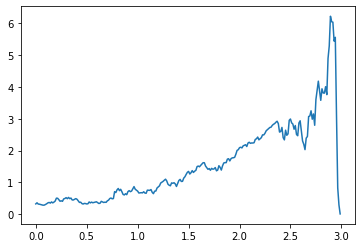

In [ ]:
plot(t,thetaCall)

In [ ]:
computeDeltaCall(market['stock'],K,est['rf'],est['std'],est['T'],np.linspace(0,1,N))

array([0.66886154, 0.65987382, 0.67215365, 0.67434953, 0.67791557,
       0.68199121, 0.68563658, 0.68578875, 0.68179581, 0.67661265,
       0.67014662, 0.66745012, 0.67413002, 0.66532234, 0.67442286,
       0.66885048, 0.66080346, 0.63486005, 0.6370834 , 0.65188864,
       0.66718289, 0.6645854 , 0.6699365 , 0.65014914, 0.6475934 ,
       0.64081276, 0.65185117, 0.64135724, 0.65412031, 0.65010877,
       0.66793462, 0.66906076, 0.66468728, 0.6600973 , 0.66691371,
       0.68106357, 0.69350984, 0.69261025, 0.70336407, 0.70765167,
       0.70448719, 0.70629002, 0.70978701, 0.70956276, 0.69824092,
       0.70549066, 0.70125934, 0.70669922, 0.70558617, 0.7042775 ,
       0.7030506 , 0.70977306, 0.7158489 , 0.7151267 , 0.70414024,
       0.70881109, 0.71337658, 0.71230068, 0.71453624, 0.70591377,
       0.70255459, 0.69318877, 0.69065513, 0.6971758 , 0.69645385,
       0.64615091, 0.65566952, 0.63386934, 0.62274741, 0.64475552,
       0.63430996, 0.65674409, 0.67851085, 0.68320933, 0.67596

In [ ]:
t=np.linspace(0,est['T'],N)

deltaCall=pd.Series(data=computeDeltaCall(market['stock'],
                                          K,
                                          est['rf'],
                                          est['std'],
                                          est['T'],
                                          t),
                    index=date)
deltaCall

date
2021-08-25    0.668862
2021-08-26    0.659650
2021-08-27    0.671744
2021-08-30    0.673746
2021-08-31    0.677133
                ...   
2022-08-19    0.040571
2022-08-22    0.007390
2022-08-23    0.001836
2022-08-24    0.000038
2022-08-25    0.000000
Length: 253, dtype: float64

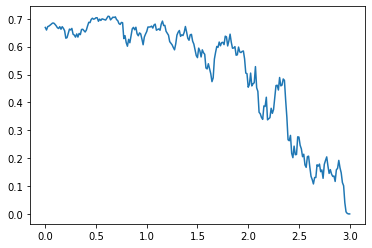

In [ ]:
plot(t,deltaCall)

In [ ]:
deltaCallDollar= np.multiply((deltaCall-deltaCall.shift(1))*alpha_c,market['stock']) # Cantidad en dinero que debo revalancear. Shift = rezago 
deltaCallDollar

date
2021-08-25             NaN
2021-08-26    -8084.117211
2021-08-27    10720.785787
2021-08-30     1777.292383
2021-08-31     3016.872316
                  ...     
2022-08-19   -49984.474217
2022-08-22   -27080.933998
2022-08-23    -4544.443484
2022-08-24    -1476.647702
2022-08-25      -31.284687
Length: 253, dtype: float64

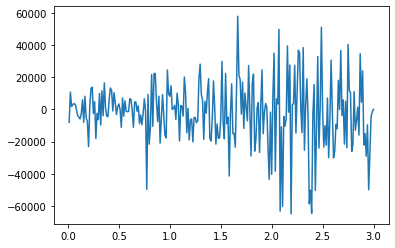

In [ ]:
plot(t,deltaCallDollar) # Al asumir porcentajes de pérdidas, se puede caer en volumenes más altos de rebalanceio, lo que constituye mayor riesgo de equivocación.

In [ ]:
## Replicacion de Call y creacion de la estrategia de portafolio

def structuredPortfolio(market,sigma=est['std']):
  #actualizacion local del valor de la opcion para recalcular
  C0_loc=BSCall(market['stock'][0],K,est['rf'],sigma,0,est['T'])
  alpha_c=(V0-Vmin*A0/AT)/C0_loc

  deltaCall=pd.Series(data=computeDeltaCall(market['stock'],
                                          K,
                                          est['rf'],
                                          sigma,
                                          est['T'],
                                          t),
                    index=date)

  #declaracion de portafolio
  portfolio=pd.DataFrame(index=date,columns=['alpha_a','alpha_s','value'],dtype=float)
  portfolio['value'][0]=V0
  portfolio['alpha_s']=deltaCall*alpha_c
  portfolio['alpha_a'][0]=(V0-portfolio['alpha_s'][0]*market['stock'][0])/A0

  for i in range(1,N):
    if i<N-1:
      #rebalancear segun la regla
      deltaStock=portfolio['alpha_s'][i]-portfolio['alpha_s'][i-1]
      portfolio['alpha_a'][i]=(portfolio['alpha_a'][i-1]*market['bond'][i]+
                               -deltaStock*market['stock'][i])/market['bond'][i]
    else:
      #tomar el ultimo valor porque ya no se puede rebalancer.
      portfolio['alpha_s'][i]=portfolio['alpha_s'][i-1]
      portfolio['alpha_a'][i]=portfolio['alpha_a'][i-1]

    portfolio['value'].iloc[i]=np.dot(portfolio[['alpha_a','alpha_s']].iloc[i],market.iloc[i])

  return portfolio,alpha_c

portfolio_t=structuredPortfolio(market,0.437)[0]

portfolio_t


print(np.log(((Vmin+alpha_c*np.max([0,market['stock'][-1]-K]))/V0))) # retorno que yo espero teórico

print(np.log(portfolio_t['value'][-1]/portfolio_t['value'][0])) #retorno final de la estrategia

In [ ]:
portfolio_t # 8k de descuadre por error de modelo. Investigar cómo se puede ajustar y no tener descuadre. Revisar volatilidad. 
# Al aumentar la volatilidad castiga el activo libre de riesgo por ende pagaré menos en el fondeo.

,alpha_a,alpha_s,value
date,,,
2021-08-25,8195.233690,2946.296994,1.000000e+06
2021-08-26,8213.521421,2930.433320,9.983511e+05
2021-08-27,8191.864304,2949.044766,1.001729e+06
2021-08-30,8189.198699,2951.332690,1.002736e+06
2021-08-31,8183.880025,2955.887061,1.004077e+06
...,...,...,...
2022-08-19,9922.671113,1121.669148,1.095008e+06
2022-08-22,10243.929597,774.321409,1.094192e+06
2022-08-23,10423.291930,580.793731,1.094946e+06


Text(0.5, 1.0, 'Comparacion de retornos del portafolio con piso y sin piso')

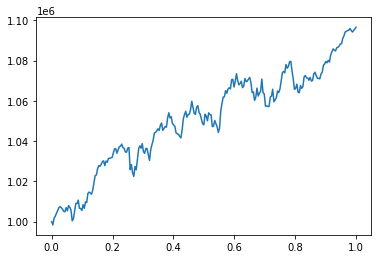

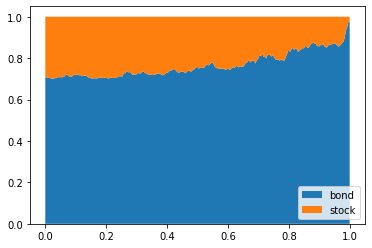

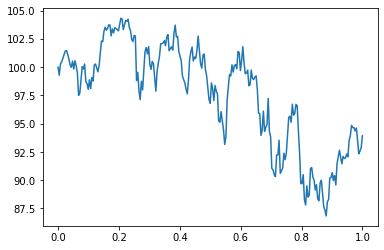

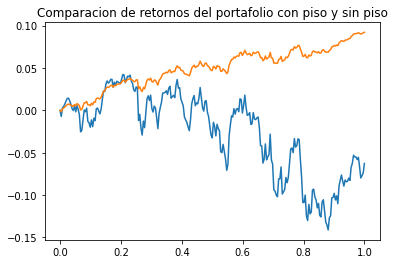

In [ ]:
#grafica del valor del portafolio
fig,a1=subplots()
a1.plot(np.array(range(N))/(N-1),portfolio_t['value'])

#grafica de proporcion de portafolio
fig,a2=subplots()
a2.stackplot(np.array(range(N))/(N-1),
             np.multiply(np.multiply(portfolio_t['alpha_a'],market['bond']),1/portfolio_t['value']),
             np.multiply(np.multiply(portfolio_t['alpha_s'],market['stock']),1/portfolio_t['value']),
             labels=market.columns)
a2.legend(loc='lower right')

fig,a3=subplots()
a3.plot(np.array(range(N))/(N-1),market['stock'])

_,a4=subplots()
a4.plot(np.array(range(N))/(N-1),np.log(market['stock']/market['stock'][0]))
a4.plot(np.array(range(N))/(N-1),np.log(portfolio_t['value']/portfolio_t['value'][0]))
#a4.set_label()
title('Comparacion de retornos del portafolio con piso y sin piso')

Simulación Montecarlo

In [ ]:
print(est['std'])
print(np.std(np.log(market['stock'])-np.log(market['stock'].shift(1)))*np.sqrt(250)) # Volatilidad histórica 0,31. Volatilidad toda la serie 0,43.
# Pudo ser la razón del descuadre. 

0.16976975579501266
0.16976975579501266


In [ ]:
%%time
simMarket=market.copy()
sim=1250
simPrices={}

portfolioResult1=pd.DataFrame(index=range(sim),columns=['simResult','realResult','diff'],dtype=float)
t_sim = np.linspace(1/N,est['T'], N-1)
sigmaSim = est['std']*0.4 # Volatilidad igual a la histórica. 1,4 = 0,41/0,31

for i in range(sim):

    Zcum=np.cumsum(np.random.normal(loc=0,scale=1,size=N-1)) # Z acumulado para pegar a los precios simulados.

    simMarket['stock'][1:]= (simMarket['stock'][0]*
                          np.exp((est['mean']-0.5*np.power(sigmaSim,2))*t_sim+
                          sigmaSim*np.sqrt(est['T']/N)*Zcum)) #[0] el primer precio permanece constante. Referencia todos los demas precios. 
    simPrices[i]=simMarket['stock'].copy() # Guarda una copia de los precios hallados en el comando anterior para trabajarlos más adelante y optimizar memoria.
    portfolio,alpha_c_sim = structuredPortfolio(simMarket,est['std'])
    portfolioResult1['simResult'][i]= portfolio['value'][-1]
    portfolioResult1['realResult'][i]=Vmin+alpha_c_sim*np.max([0,simMarket['stock'][-1]-K])
    portfolioResult1['diff'][i]=portfolioResult1['simResult'][i]-portfolioResult1['realResult'][i] # Si el resultado es valor positivo = me sobraron recursos. 
    # Si el resultado es valor negativo = me faltaron recursos.  



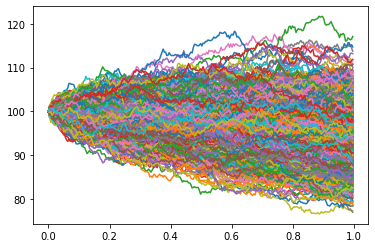

In [ ]:
#grafica de precios simulados
fig,a1=subplots()
for i in simPrices:
  a1.plot(np.array(range(N))/N,simPrices[i])

(array([  6.,  18.,  64.,  98., 145., 208., 221., 234., 192.,  64.]),
 array([ 2692.20388607,  3832.09916629,  4971.99444651,  6111.88972673,
         7251.78500695,  8391.68028717,  9531.57556739, 10671.47084761,
        11811.36612783, 12951.26140805, 14091.15668828]),
 <a list of 10 Patch objects>)

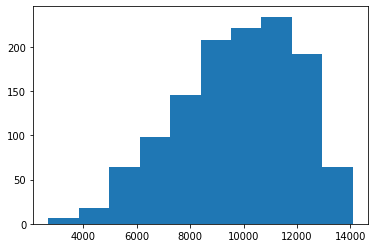

In [ ]:
#hist diferencias
hist(portfolioResult1['diff'])

In [ ]:
mediaDiff=np.mean(portfolioResult1['diff'])
print('media de las diff: %0.2f' %(mediaDiff))
print('std de las diff: %0.2f' %(np.std(portfolioResult1['diff'])))
esm=np.std(portfolioResult1['diff'])/np.sqrt(sim)
print('error estandar de la media de las diff: %0.2f' %(esm))
print('la media se encuentra con el 95 porciento de confianza entre: %0.2f y %0.2f' %(mediaDiff-2*esm,mediaDiff+2*esm))
print('La maxima perdida posible con el 99 de confianza sera: %0.2f' %(np.percentile(portfolioResult1['diff'],1)))

media de las diff: 9776.67
std de las diff: 2235.87
error estandar de la media de las diff: 63.24
la media se encuentra con el 95 porciento de confianza entre: 9650.19 y 9903.15
La maxima perdida posible con el 99 de confianza sera: 4227.29


In [ ]:
from scipy.stats.stats import kurtosis
kurtosis(portfolioResult1['diff']) # se mide contra 3. Lo que constituye que no tiene tanta curtosis. No tiene sesgo la diferencia. Ni me quita ni me pone.

-0.4185045963076921

In [ ]:
np.min(portfolioResult1['diff'])

2692.2038860677276

**Escenarios**

1. Cuando la volatilidad realizada es igual a la vol proyectada, entonces en promedio el efecto del rebalanceo discreto es cero (0), y el VaR (99) es 3621.

2. Cuando la volatilidad realizada es mayor a la vol proyectada en promedio el efecto del rebalanceo discreto es -11.000 y el VaR (99) es -25.300. 

3. Cuando la volatilidad realizada es menor a la vol proyectada en promedio el efecto del rebalanceo discreto es 11.500 y el VaR (99) es 11.900

4. 